<a href="https://colab.research.google.com/github/rayxuan2000/Customer-Reviews-Analysis-and-Topic-Modeling/blob/main/Women's_E_Commerce_Clothing_Reviews_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Set up environment

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the folder
%cd /content/drive/My Drive/resume_project/Customer_review

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/resume_project/Customer_review


# 2.Load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv', sep=',', on_bad_lines='skip')

#3.EDA and data cleaning

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

## drop meaningless columns

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

## duplicated

In [10]:
df[df.duplicated(keep=False)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
298,1104,39,NaN,NaN,5,1,0,General,Dresses,Dresses
493,1104,39,NaN,NaN,5,1,0,General,Dresses,Dresses
1004,1094,30,NaN,NaN,5,1,0,General,Dresses,Dresses
2739,1094,36,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
2941,829,66,NaN,NaN,5,1,0,General Petite,Tops,Blouses
2959,1094,30,NaN,NaN,5,1,0,General,Dresses,Dresses
3961,895,36,NaN,NaN,5,1,0,General Petite,Tops,Fine gauge
3976,1078,35,NaN,NaN,5,1,0,General,Dresses,Dresses
4850,829,66,NaN,NaN,5,1,0,General Petite,Tops,Blouses
4866,834,70,NaN,NaN,5,1,0,General Petite,Tops,Blouses


In [11]:
df_dup = df.drop_duplicates(keep='first')

In [12]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23465 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23465 non-null  int64 
 1   Age                      23465 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   23465 non-null  int64 
 5   Recommended IND          23465 non-null  int64 
 6   Positive Feedback Count  23465 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


## nan

In [13]:
columns_to_check = ['Division Name', 'Department Name', 'Class Name']
df_nan = df_dup.dropna(subset=columns_to_check)
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23451 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23451 non-null  int64 
 1   Age                      23451 non-null  int64 
 2   Title                    19663 non-null  object
 3   Review Text              22627 non-null  object
 4   Rating                   23451 non-null  int64 
 5   Recommended IND          23451 non-null  int64 
 6   Positive Feedback Count  23451 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [14]:
df_nan.reset_index(drop=True,inplace=True)

## Visualization

In [15]:
df_clean = df_nan

In [16]:
df_clean['Division Name'].value_counts(), df_clean['Department Name'].value_counts(), df_clean['Class Name'].value_counts(),

(Division Name
 General           13839
 General Petite     8110
 Initmates          1502
 Name: count, dtype: int64,
 Department Name
 Tops        10455
 Dresses      6312
 Bottoms      3798
 Intimate     1735
 Jackets      1032
 Trend         119
 Name: count, dtype: int64,
 Class Name
 Dresses           6312
 Knits             4835
 Blouses           3093
 Sweaters          1428
 Pants             1388
 Jeans             1146
 Fine gauge        1099
 Skirts             945
 Jackets            704
 Lounge             691
 Swim               350
 Outerwear          328
 Shorts             317
 Sleep              228
 Legwear            165
 Intimates          154
 Layering           146
 Trend              119
 Casual bottoms       2
 Chemises             1
 Name: count, dtype: int64)

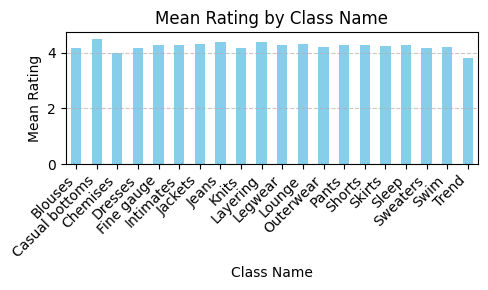

In [17]:
# average rating for each class
mean_rating_by_class = df_clean.groupby('Class Name')['Rating'].mean()

# Plot
plt.figure(figsize=(5, 3))
mean_rating_by_class.plot(kind='bar', color='skyblue')
plt.title('Mean Rating by Class Name')
plt.xlabel('Class Name')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Age

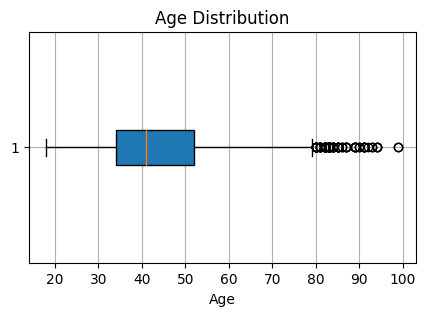

In [18]:
# Plot horizontal box plot
plt.figure(figsize=(5, 3))
plt.boxplot(df_clean['Age'], vert=False, patch_artist=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.grid(True)
plt.show()

### Rating

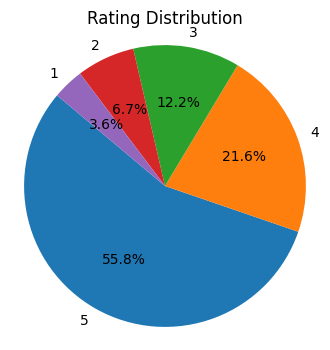

In [19]:
# Calculate value counts for 'Rating' column
rating_counts = df_clean['Rating'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

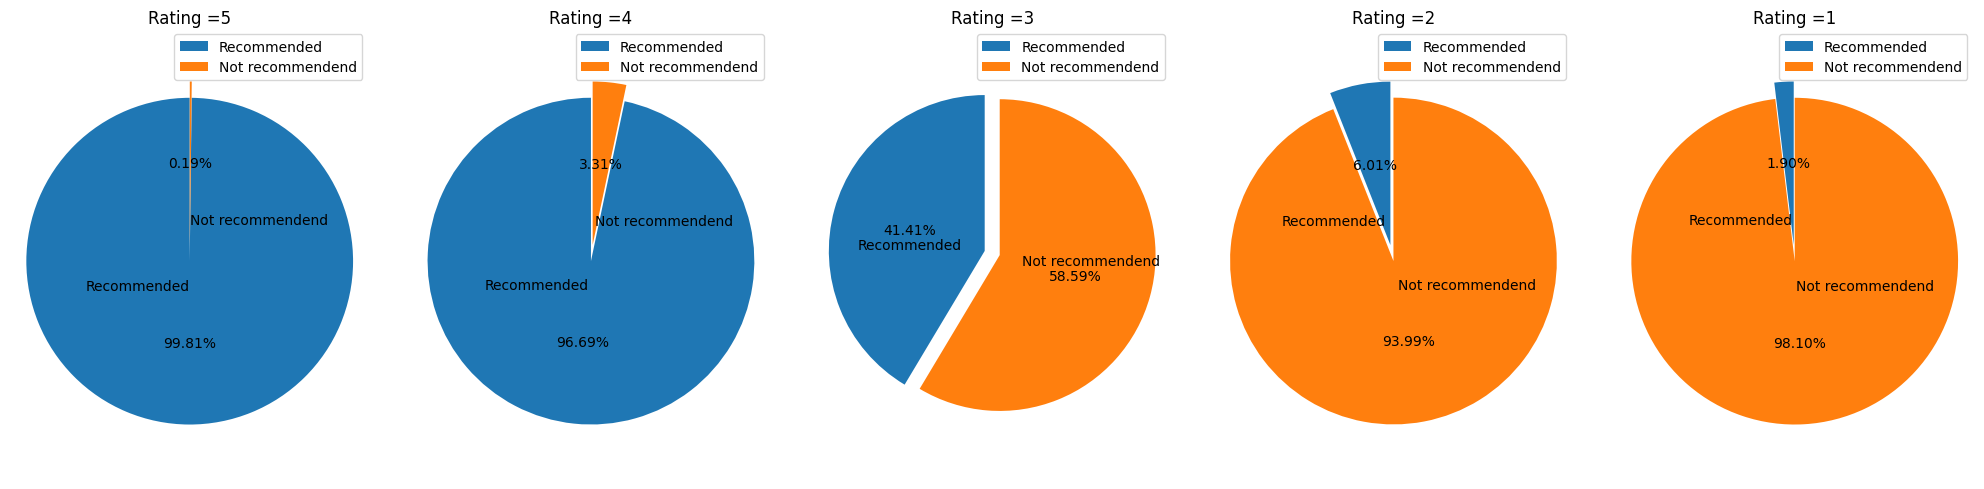

In [20]:
fig,axes=plt.subplots(1,5,figsize=[20,5])
labels=['Recommended','Not recommendend']
explode=[0.05,0.05]
for i in range(5):
  axes[i].pie([df_clean[(df_clean['Rating']==5-i) & (df_clean['Recommended IND']==1)]['Recommended IND'].value_counts().iloc[0],df_clean[(df_clean['Rating']==5-i) & (df_clean['Recommended IND']==0)]['Recommended IND'].value_counts().iloc[0]],
          # colors=colors,
          labels=labels,
          explode=explode,
          autopct='%.2f%%',
          shadow=False,
          startangle=90,
          pctdistance=0.5,
          labeldistance =0.15
        )
  axes[i].axis('equal')
  axes[i].legend(loc='best')
  axes[i].set_title(label='Rating ='+ str(5-i),loc='center',pad=2.0)
fig.tight_layout()

From above figures, the two columns are related in a way. This can basically divide the whole dataset into two groups.

<Axes: xlabel='Recommended IND', ylabel='count'>

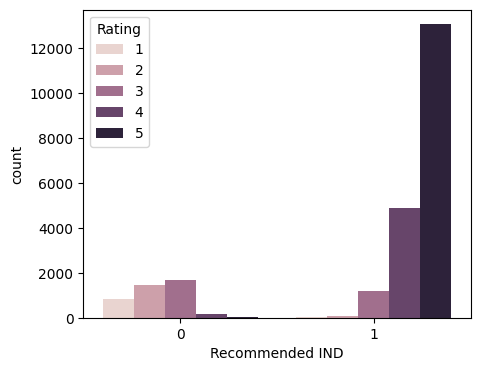

In [21]:
_,axss = plt.subplots(1,1, figsize=[5,4])
sns.countplot(x='Recommended IND', hue='Rating', data=df_clean, ax=axss)

### Positive feedback (res and not rec)

In [22]:
top_k_pos = df_clean.nlargest(5, 'Positive Feedback Count')
top_k_pos

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7213,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses
1293,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses
7760,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets
19071,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear
13200,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses


<Axes: xlabel='Rating', ylabel='Positive Feedback Count'>

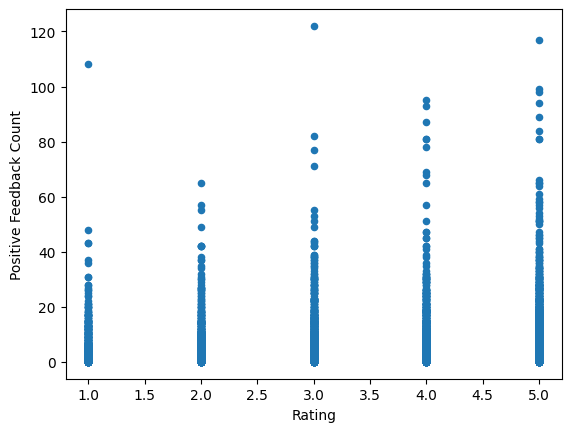

In [23]:
# Rating vs Positive Feedback Count

df_clean.plot.scatter(x='Rating', y='Positive Feedback Count')

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23451 entries, 0 to 23450
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23451 non-null  int64 
 1   Age                      23451 non-null  int64 
 2   Title                    19663 non-null  object
 3   Review Text              22627 non-null  object
 4   Rating                   23451 non-null  int64 
 5   Recommended IND          23451 non-null  int64 
 6   Positive Feedback Count  23451 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


## text split and word cloud

In [25]:
data_positive=df_clean[(df_clean['Rating']>=4) | (df_clean['Recommended IND']==1)][['Review Text']]
data_positive

,Review Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
6,I aded this in my basket at hte last mintue to...
...,...
23445,So i wasn't sure about ordering this skirt bec...
23446,I was very happy to snag this dress at such a ...
23447,"It reminds me of maternity clothes. soft, stre..."
23449,I bought this dress for a wedding i have this ...


In [26]:
data_positive.reset_index(inplace=True,drop=True)
data_positive

,Review Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,"I love, love, love this jumpsuit. it's fun, fl..."
3,This shirt is very flattering to all due to th...
4,I aded this in my basket at hte last mintue to...
...,...
19467,So i wasn't sure about ordering this skirt bec...
19468,I was very happy to snag this dress at such a ...
19469,"It reminds me of maternity clothes. soft, stre..."
19470,I bought this dress for a wedding i have this ...


In [27]:
from wordcloud import WordCloud

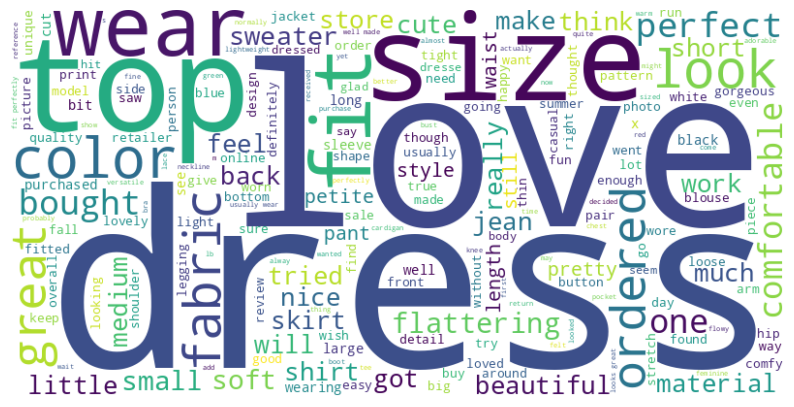

In [28]:
data_positive['Review Text'].fillna('', inplace=True)

# Concatenate all the review texts into a single string
text = ' '.join(data_positive['Review Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
data_negative=df_clean[(df_clean['Rating']<=2) | (df_clean['Recommended IND']==0)][['Review Text']]
data_negative

,Review Text
2,I had such high hopes for this dress and reall...
5,"I love tracy reese dresses, but this one is no..."
10,Dress runs small esp where the zipper area run...
22,"First of all, this is not pullover styling. th..."
25,"Loved the material, but i didnt really look at..."
...,...
23415,I tried these on because the color is really p...
23416,I wanted to love this jacket. so soft and grea...
23426,I purchased this for a very good price and i t...
23444,I was surprised at the positive reviews for th...


In [30]:
data_negative.reset_index(inplace=True,drop=True)
data_negative

,Review Text
0,I had such high hopes for this dress and reall...
1,"I love tracy reese dresses, but this one is no..."
2,Dress runs small esp where the zipper area run...
3,"First of all, this is not pullover styling. th..."
4,"Loved the material, but i didnt really look at..."
...,...
4277,I tried these on because the color is really p...
4278,I wanted to love this jacket. so soft and grea...
4279,I purchased this for a very good price and i t...
4280,I was surprised at the positive reviews for th...


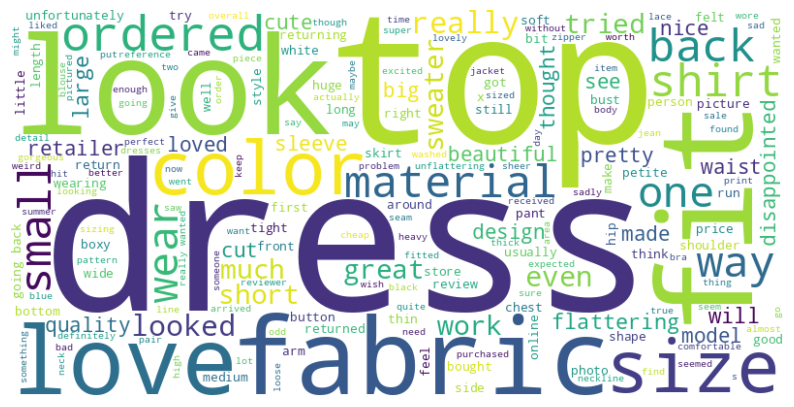

In [31]:
data_negative['Review Text'].fillna('', inplace=True)

# Concatenate all the review texts into a single string
text = ' '.join(data_negative['Review Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The purpose of presenting word cloud is to prepare for adding some meaningless stop words. A more comprehensive NLP work will be done in the next part.

# 4.Tokenization and stemming

In [32]:
data=data_positive['Review Text']
# data=data_negative['Review Text']
# data = df_clean['Review Text']

In [33]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("clothing")
stopwords.append("clothes")

stopwords.append('dress')


print ("Total number of stop words is " + str(len(stopwords)) + ".")
print('stopwords:')
print(stopwords,end=',')

Total number of stop words is 186.
stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',

In [34]:
data[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [35]:
from nltk.tokenize import word_tokenize
print(word_tokenize(data[0]),end=',')

['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable'],

In [36]:
pd.Series(word_tokenize(data[0])).value_counts()

and            2
Absolutely     1
wonderful      1
-              1
silky          1
sexy           1
comfortable    1
Name: count, dtype: int64

In [37]:
# from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []

    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)

    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [38]:
data[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [39]:
print(tokenization_and_stemming(data[0]),end=',')

['absolut', 'wonder', 'silki', 'sexi', 'comfort'],

#5.TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model= TfidfVectorizer(max_df = 0.95, max_features=800, min_df = 0.05,\
                             stop_words='english', use_idf=True, tokenizer = \
                             tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix= tfidf_model.fit_transform(data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + " reviews with "\
       + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 19472 reviews with 87 terms.


In [41]:
tfidf_matrix

<19472x87 sparse matrix of type '<class 'numpy.float64'>'
	with 183932 stored elements in Compressed Sparse Row format>

In [42]:
tfidf_matrix.toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.2914799, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [43]:
data[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [44]:
tfidf_matrix.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [45]:
tfidf_matrix.todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.2914799, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

In [46]:
print(type(tfidf_matrix.toarray()))

<class 'numpy.ndarray'>


In [47]:
print(type(tfidf_matrix.todense()))

<class 'numpy.matrix'>


In [48]:
# words
tf_selected_words = tfidf_model.get_feature_names_out()

In [49]:
# print out words
tf_selected_words

array(['beauti', 'big', 'bit', 'black', 'bought', 'buy', 'casual',
       'color', 'comfort', 'compliment', 'cut', 'cute', 'definit',
       'design', 'dress', 'fabric', 'fall', 'feel', 'fit', 'flatter',
       'good', 'got', 'great', 'high', 'howev', 'jean', 'larg', 'lbs',
       'leg', 'length', 'like', 'line', 'littl', 'long', 'look', 'love',
       'make', 'materi', 'medium', 'need', 'nice', 'normal', 'onlin',
       'order', 'pair', 'pant', 'perfect', 'person', 'petit', 'pictur',
       'piec', 'pretti', 'purchas', 'qualiti', 'realli', 'recommend',
       'retail', 'review', 'right', 'run', 'sale', 'shirt', 'short',
       'size', 'skirt', 'sleev', 'small', 'soft', 'store', 'style',
       'summer', 'super', 'sweater', 'think', 'tight', 'time', 'tri',
       'true', 'usual', 'waist', 'want', 'way', 'wear', 'white', 'work',
       'worn', 'xs'], dtype=object)

#6.K-Means clustering

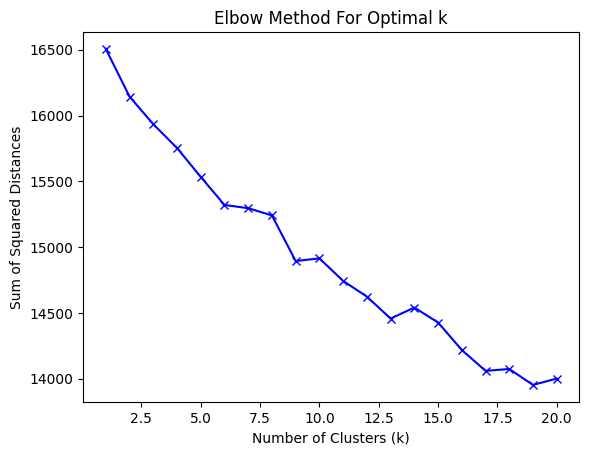

In [50]:
from sklearn.cluster import KMeans

# Calculate sum of squared distances for different values of k
sum_of_squared_distances = []
K = range(1, 21)

for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(tfidf_matrix)
    sum_of_squared_distances.append(km.inertia_)

# Plot the elbow curve
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 6

# number of clusters
km = KMeans(n_clusters = num_clusters,n_init='auto')

km.fit(tfidf_matrix)


clusters = km.labels_.tolist()

In [52]:
# create DataFrame films from all of the input files.
if len(data)==len(data_positive):
  product = { 'reviews': df_clean[(df_clean['Rating']>=4) | (df_clean['Recommended IND']==1)]['Review Text'], 'cluster': clusters}
else:
  product = { 'reviews': df_clean[(df_clean['Rating']<=2) | (df_clean['Recommended IND']==0)]['Review Text'], 'cluster': clusters}
# product = { 'reviews': df_clean['Review Text'], 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['reviews', 'cluster'])

In [53]:
frame.head(10)

,reviews,cluster
0,Absolutely wonderful - silky and sexy and comf...,2
1,Love this dress! it's sooo pretty. i happene...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,3
6,I aded this in my basket at hte last mintue to...,2
7,"I ordered this in carbon for store pick up, an...",0
8,I love this dress. i usually get an xs but it ...,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",4
11,This dress is perfection! so pretty and flatte...,4
12,More and more i find myself reliant on the rev...,2


In [54]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,count
cluster,
2,7109
5,4409
1,3154
4,2677
0,1193
3,930


In [55]:
km.cluster_centers_

array([[4.04752091e-02, 1.89596093e-02, 4.40020907e-02, 2.21363290e-02,
        3.51386618e-02, 1.23764514e-02, 1.56855722e-02, 6.59607322e-02,
        3.21843800e-02, 1.19933866e-02, 2.31501699e-02, 3.99345886e-02,
        1.96933299e-02, 2.60842804e-02, 1.79925905e-02, 4.93960454e-02,
        3.56606322e-02, 3.13825955e-02, 8.04137378e-02, 3.71778727e-02,
        2.52025368e-02, 2.67320708e-02, 5.80594032e-02, 1.46651214e-02,
        1.89038748e-02, 2.37219103e-02, 2.98985747e-02, 1.71698742e-02,
        6.92914439e-03, 6.68571470e-02, 7.47104082e-02, 1.93792754e-02,
        5.13643166e-02, 1.00768213e-01, 8.37291946e-02, 8.55144879e-02,
        3.22599873e-02, 3.58140711e-02, 2.87612447e-02, 1.79038530e-02,
        5.53097700e-02, 1.25850973e-02, 1.58850372e-02, 4.30147235e-02,
        1.10131469e-02, 9.12998267e-03, 5.08814921e-02, 1.64254001e-02,
        3.53853386e-02, 2.33328889e-02, 2.39658970e-02, 3.46892212e-02,
        2.83274925e-02, 2.29752268e-02, 4.96724610e-02, 1.547514

In [56]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :5]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()

    cluster_reviews = frame[frame.cluster==i]['reviews'].tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews)) + " reviews) ")
    # print (", ".join(cluster_reviews))
    print ()

<Document clustering result by K-means>
Cluster 0 words:sleev,long,love,look,fit,
Cluster 0 reviews (1193 reviews) 

Cluster 1 words:love,color,wear,great,fit,
Cluster 1 reviews (3154 reviews) 

Cluster 2 words:look,great,like,wear,fit,
Cluster 2 reviews (7109 reviews) 

Cluster 3 words:leg,jean,wear,love,look,
Cluster 3 reviews (930 reviews) 

Cluster 4 words:perfect,fit,love,wear,color,
Cluster 4 reviews (2677 reviews) 

Cluster 5 words:size,small,fit,order,run,
Cluster 5 reviews (4409 reviews) 



#7.Topic modeling - LDA

In [57]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)

In [58]:
# document topic matrix for tfidf_matrix_lda
lda_output = lda.fit_transform(tfidf_matrix)
print(lda_output.shape)
print(lda_output)

(19472, 5)
[[0.10075545 0.10080607 0.59574948 0.10053858 0.10215043]
 [0.05223996 0.05264299 0.0514565  0.79213369 0.05152687]
 [0.06518873 0.06499084 0.73888939 0.06498921 0.06594184]
 ...
 [0.05470287 0.78019975 0.05485014 0.05459736 0.05564988]
 [0.40920314 0.45341418 0.04592652 0.04596844 0.04548772]
 [0.06168206 0.06092546 0.0608639  0.06061697 0.75591161]]


In [59]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 87)
[[2.19022238e+02 1.09776380e+02 1.58122588e+02 5.13462125e+01
  1.60767343e+02 2.24424804e+01 3.09795235e+01 2.32785793e+02
  1.05039874e+02 4.60895589e+01 5.07429719e+01 1.01417761e+02
  1.24616394e+02 8.16722249e+01 8.82679168e+01 1.36509909e+02
  8.81746812e+01 8.24242458e+01 4.68180329e+02 1.30071874e+02
  4.63945492e+01 1.39037747e+02 1.89366027e+02 9.76918044e+01
  5.92910005e+01 2.65659362e+01 4.25568198e+02 1.50499257e+02
  3.10576363e+01 9.65819301e+01 2.05016500e+02 3.64824670e+01
  2.23814448e+02 1.11886787e+02 1.67940528e+02 3.43379722e+02
  6.55546452e+01 8.91368406e+01 4.59155659e+02 7.65242955e+01
  1.40323655e+02 2.43405779e+02 2.24963752e+01 3.88968724e+02
  2.05116744e-01 7.42746066e-01 2.91289604e+02 1.93216734e+01
  8.66455577e+01 4.91506819e+01 4.31218660e+01 1.05096595e+02
  1.67712138e+02 1.22488795e+02 1.20976178e+02 1.34705724e+02
  1.32681332e+02 1.96410016e+02 6.81045868e+01 4.08749737e+02
  4.77241691e+01 1.72061140e+01 6.23830050e+01 7.30207462e+02


In [60]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.10,0.10,0.60,0.10,0.10,2
Doc1,0.05,0.05,0.05,0.79,0.05,3
Doc2,0.07,0.06,0.74,0.06,0.07,2
Doc3,0.06,0.06,0.41,0.06,0.42,4
Doc4,0.05,0.16,0.05,0.70,0.05,3
Doc5,0.04,0.57,0.05,0.28,0.05,1
Doc6,0.79,0.05,0.05,0.05,0.05,0
Doc7,0.04,0.83,0.04,0.04,0.04,1
Doc8,0.08,0.70,0.08,0.07,0.08,1
Doc9,0.05,0.78,0.05,0.06,0.05,1


In [61]:
df_document_topic['topic'].value_counts().to_frame()

,count
topic,
4,5086
0,4931
1,3564
3,3035
2,2856


In [62]:
# topic word matrix
print(lda.components_)
# topic-word matrix
df_topic_words = pd.DataFrame(lda.components_)

# column and index
df_topic_words.columns = tfidf_model.get_feature_names_out()
df_topic_words.index = topic_names

df_topic_words.head()

[[2.19022238e+02 1.09776380e+02 1.58122588e+02 5.13462125e+01
  1.60767343e+02 2.24424804e+01 3.09795235e+01 2.32785793e+02
  1.05039874e+02 4.60895589e+01 5.07429719e+01 1.01417761e+02
  1.24616394e+02 8.16722249e+01 8.82679168e+01 1.36509909e+02
  8.81746812e+01 8.24242458e+01 4.68180329e+02 1.30071874e+02
  4.63945492e+01 1.39037747e+02 1.89366027e+02 9.76918044e+01
  5.92910005e+01 2.65659362e+01 4.25568198e+02 1.50499257e+02
  3.10576363e+01 9.65819301e+01 2.05016500e+02 3.64824670e+01
  2.23814448e+02 1.11886787e+02 1.67940528e+02 3.43379722e+02
  6.55546452e+01 8.91368406e+01 4.59155659e+02 7.65242955e+01
  1.40323655e+02 2.43405779e+02 2.24963752e+01 3.88968724e+02
  2.05116744e-01 7.42746066e-01 2.91289604e+02 1.93216734e+01
  8.66455577e+01 4.91506819e+01 4.31218660e+01 1.05096595e+02
  1.67712138e+02 1.22488795e+02 1.20976178e+02 1.34705724e+02
  1.32681332e+02 1.96410016e+02 6.81045868e+01 4.08749737e+02
  4.77241691e+01 1.72061140e+01 6.23830050e+01 7.30207462e+02
  3.2229

,beauti,big,bit,black,bought,buy,casual,color,comfort,compliment,...,true,usual,waist,want,way,wear,white,work,worn,xs
Topic0,219.022238,109.776380,158.122588,51.346213,160.767343,22.442480,30.979524,232.785793,105.039874,46.089559,...,248.337153,289.400558,70.376705,104.499056,58.000940,350.076673,44.383557,80.855243,45.795489,119.625596
Topic1,161.474292,49.852358,188.643591,70.314468,58.015564,19.361711,17.557770,217.891470,94.442593,0.298202,...,49.457248,81.805999,342.441372,95.842109,101.318456,209.121823,78.060659,164.902147,27.118074,104.524041
Topic2,39.962176,49.866892,88.575457,154.221746,164.678756,113.477383,82.758252,163.169919,324.712402,342.992255,...,32.787703,25.862799,15.328889,43.749904,30.025047,246.501269,166.484613,98.446298,190.602938,12.206470
Topic3,146.156372,225.740113,125.734678,60.901752,160.024006,110.617401,17.730005,242.758142,61.550658,7.310387,...,51.145221,177.345916,47.786812,115.698404,131.209565,166.739744,50.604590,92.189180,5.994904,247.137298
Topic4,287.351095,0.202441,108.152615,119.949742,178.262217,79.764307,206.643523,428.269051,294.113444,0.843571,...,99.782458,32.478137,63.446390,89.333166,81.318192,402.290062,45.179036,205.548466,85.229634,0.679102


In [63]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names_out())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=10)

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,size,small,fit,medium,larg,run,order,wear,sweater,love
Topic 1,skirt,waist,fit,nice,petit,love,cut,fabric,like,line
Topic 2,shirt,cute,compliment,comfort,love,pant,super,wear,got,great
Topic 3,tri,store,size,look,onlin,like,fit,person,love,xs
Topic 4,love,great,jean,look,fit,color,wear,perfect,soft,pair


# 8.Sentiment prediction modeling

In this part, I'd like to vectorize review text and applied some models on them to predict the sentiment.

In [66]:
df_clean.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23446,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23447,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23448,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23449,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23450,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [67]:
# Replace missing values in 'Review Text' column with empty strings
df_clean['Review Text'] = df_clean['Review Text'].fillna('')

# Step 1: Tokenization and stemming
df_clean['tokenized_text'] = df_clean['Review Text'].apply(tokenization_and_stemming)
df_clean['tokenized_text']

0                  [absolut, wonder, silki, sexi, comfort]
1        [love, sooo, pretti, happen, find, store, glad...
2        [high, hope, realli, want, work, initi, order,...
3        [love, love, love, jumpsuit, fun, flirti, fabu...
4        [shirt, flatter, due, adjust, front, tie, perf...
                               ...                        
23446    [happi, snag, great, price, easi, slip, flatte...
23447    [remind, matern, soft, stretchi, shini, materi...
23448    [fit, well, top, see, never, would, work, glad...
23449    [bought, wed, summer, cute, unfortun, fit, per...
23450    [love, platinum, feminin, fit, perfect, easi, ...
Name: tokenized_text, Length: 23451, dtype: object

In [68]:
# Step 2: Generate target column for sentiment

df_clean['sentiment'] = ((df_clean['Rating'] >= 4) | (df_clean['Recommended IND'] == 1)).astype(int)
df_clean.loc[(df_clean['Rating'] <= 2) & (df_clean['Recommended IND'] == 0), 'sentiment'] = 0
df_clean.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,tokenized_text,sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolut, wonder, silki, sexi, comfort]",1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, sooo, pretti, happen, find, store, glad...",1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hope, realli, want, work, initi, order,...",0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirti, fabu...",1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flatter, due, adjust, front, tie, perf...",1


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [70]:
# Step 3: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean['tokenized_text'], df_clean['sentiment'], test_size=0.2, random_state=42)

# Step 4: Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))

In [71]:
X_train.head()

10297    [tri, green, one, store, store, green, lace, s...
5306     [love, poncho, would, wear, beach, even, fun, ...
316      [realli, like, blous, lot, easi, wear, wore, p...
11176    [top, look, better, onlin, one, review, said, ...
6664     [want, hate, jean, expens, everi, time, tri, l...
Name: tokenized_text, dtype: object

In [72]:
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Logistic regression

In [73]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)
lr_probs = lr_classifier.predict_proba(X_test_tfidf)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

## Naive Bayes

In [74]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_probs = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

## SVM

In [81]:
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_tfidf, y_train)
svm_probs = svm_classifier.predict_proba(X_test_tfidf)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

## ROC

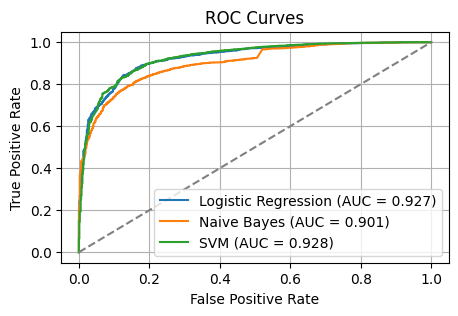

In [88]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves
plt.figure(figsize=(5, 3))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()